<a href="https://colab.research.google.com/github/schmelto/machine-learning-with-python/blob/main/Deeplearning/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST-Dataset

### Imports

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Helper Class for showing output of the network

In [16]:
import typing
from typing import TYPE_CHECKING

def plot_predictions(
    mdl: "keras.models.Model",
    inputs: np.ndarray,
    labels: typing.Optional[np.ndarray] = None,
    classes: typing.Optional[typing.List[int]] = None,
    images: typing.Optional[np.ndarray] = None,
    max_cols: int = 3,
    figsize: typing.Tuple[int, int] = (3, 2),
    sparse: bool = False,
) -> None:
    assert len(inputs) > 0, "Need at least one input"
    assert len(inputs) <= 100, "Wont plot more than 100 images"
    if labels is not None:
        assert len(inputs) == len(labels), "Need as many labels as inputs!"
    num_cols = min(len(inputs), max_cols)
    num_rows = int(len(inputs) / num_cols)
    fig, plots = plt.subplots(
        num_rows, num_cols, figsize=(figsize[0] * num_cols, figsize[1] * num_rows)
    )
    model_predictions = mdl.predict(inputs)
    if classes is None:
        classes = list(range(len(model_predictions[0])))
    if images is None:
        images = inputs
    else:
        assert len(classes) == len(
            model_predictions[0]
        ), "Need as many class names as there are output neurons"
    for r in range(num_rows):
        for c in range(num_cols):
            i = r * num_cols + c
            if not i < len(inputs):
                continue
            predicted_label = np.argmax(model_predictions[i])
            title = str(classes[predicted_label])
            if labels is None:
                color, weight = ("blue", "normal")
            else:
                expected_label = labels[i] if sparse else np.argmax(labels[i])
                prediction_correct = predicted_label == expected_label
                if not prediction_correct:
                    title += f" (should be {classes[expected_label]})"
                color, weight = (
                    ("green", "light") if prediction_correct else ("red", "bold")
                )
            plots[r][c].tick_params(top=False, bottom=False, left=False, right=False)
            plots[r][c].imshow(images[i], cmap=plt.cm.binary)
            plots[r][c].axis("off")
            plots[r][c].set_title(title, color=color, weight=weight)

## Load of the MNIST-Dataset
First of all we want to load the MNIST-Dataset.

In [ ]:
data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

We have to normalize the values of the pixles by deviding the values by 255.

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

* The picture with the handwrited 5 has the label 5.
* We want to have the lable as a Vektor [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] which is in the necessary  for our network. This vektor has now on position 5 (starting at 0) a 1.

In [ ]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

## Design of a network

Now we have normalized the input data and the labels are available as vectors. So we can finally start building a network for recognizing the handwritten numbers.

We want to define a very simple network with 3 layers (input layer, hidden layer and output layer):

* We use a keras.layers.Flatten layer as the input layer, which distributes the 28x28 matrices that we receive as inputs to 28x28 = 784 neurons
* Next, we use a keras.layers.Dense layer with 128 neurons for the hidden layer
* We use a keras.layers.Dense layer with 10 neurons as the output layer, since we want to recognize 10 classes (digits from 0-9)

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='sigmoid'),
                          keras.layers.Dense(10, activation='sigmoid')
])

## Compiling of the newtork

After we have defined our network, we have to compile it before we can start training.

In this step we define important parameters for the training phase:

* The **optimizer** is the learning algorithm used in training to improve the network. In the last week we already got to know Gradient Descent and its optimization Stochastic Gradient Descent.
* The **loss** is the cost function used. The aim during training is to minimize this. We already got to know the squared error function in week 1.
* The **metrics** are the metrics evaluated during training. For all classification problems we are interested in the "accuracy".
In this example we use

The Stochastic Gradient Descent ("sgd") learning algorithm as our optimizer.
The "mean_squared_error" cost function which, compared to the normal squared error cost function, does not calculate the sum but the mean of the errors of the output neurons.

In [ ]:
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

## Train the network

Now we can finally train our network. To do this, we use the fit method and transfer our training images as inputs with the associated labels as desired outputs. The number of epochs indicates how often the network can see the entire training set. If we increase the number of epochs, we let our network learn longer.

In [ ]:
model.fit(train_images, train_vec_labels, epochs=10, verbose=True)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.1357
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.2801
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.3752
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.4261
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850 - accuracy: 0.4452
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.4710
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0820 - accuracy: 0.4913
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.5140
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.5350
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.076

## Evalutaion of the newtork

So far, the network has only seen training images and learned from them. But the aim is to recognize new images of handwritten numbers with our network. That's why there is the test data with which we now want to check our network for accuracy in the case of unseen data.

In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.58


# Output of the network

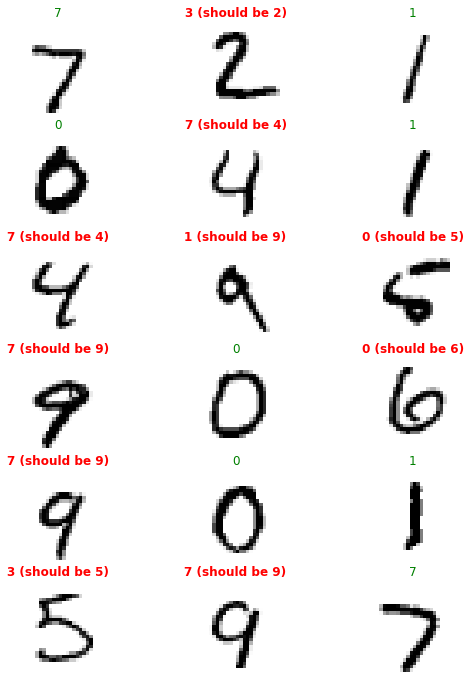

In [ ]:
plot_predictions(model, test_images[:20], labels=test_vec_labels[:20])

# Fashion MNIST-Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])

In [7]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

In [8]:
model.fit(train_images, train_vec_labels, epochs=50, verbose=True)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1403 - accuracy: 0.1576
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.3539
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0850 - accuracy: 0.4390
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0824 - accuracy: 0.4872
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0796 - accuracy: 0.5026
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0767 - accuracy: 0.5238
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0739 - accuracy: 0.5449
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0713 - accuracy: 0.5693
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0689 - accuracy: 0.5905
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.066

In [10]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.75


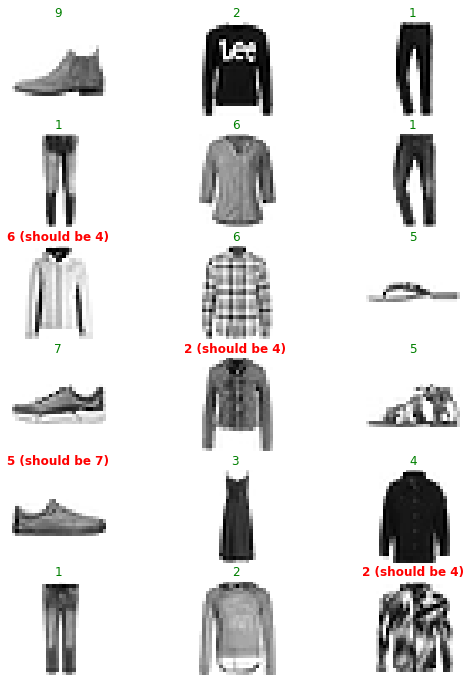

In [18]:
plot_predictions(model, test_images[:20], labels=test_vec_labels[:20])